# Clustering on the Planted model with AddS-4 and SPUR.

In the reference paper we use a planted model in our theoretical guarantees and to empirically evaluate the performance of our methods. Here, we show how we can use adds-clustering to estimate the number of clusters in this planted model and partition it.

## Imports
We start by importing SPUR, a function to estimate the number of clusters.

In [1]:
from addsclustering import SPUR

Then we choose an oracle from the module oracle. Here, we settle for an oracle that takes a similarity matrix and generate a number of quadruplets from it.

In [2]:
from addsclustering.oracle import OracleQuadruplets

We also need to choose the AddS similarity that will be used to aggregate the comparisons. Here, we settle for AddS-4.

In [3]:
from addsclustering.similarity import get_AddS_quadruplets

To generate the data of the planted model we use the code provided in resources.

In [4]:
import sys
sys.path.append("../resources/")
from utils import planted_model

Finally we import numpy for array manipulations, matplotlib.pyplot to visualize the similarity matrix, kmeans from scikit-learn for the final clustering step, and adjusted_rand_score to evaluate the quality of the clustering.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

## The Planted Model

To generate data for our planted model we use the code provided in resources. We generate the data corresponding to the plot in figure 1(a) where we vary the number of comparisons. Here we generate a single points from this plots where we use $n(\ln n)^3$ comparisons.

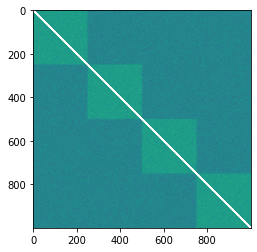

In [9]:
n_examples = 1000
n_clusters = 4
delta = 0.5
distribution='NormalNormal'
epsilon = 0.75
n_comparisons = int(n_examples*(np.log(n_examples)**3))

original_similarities, original_clusters = planted_model(n_examples, n_clusters, delta, distribution)

plt.figure()
plt.imshow(original_similarities)
plt.show()

## Using SPUR

### Oracle

To use SPUR we start by using an Oracle to generate the quadruplets and, then, we aggregate these comparisons in the similarity matrix corresponding to AddS-4.

In [10]:
adds_similarities = get_AddS_quadruplets(OracleQuadruplets(original_similarities,n_examples,n_quadruplets=n_comparisons,proportion_noise=(1-epsilon)/2),n_examples)

### SPUR

We can now use SPUR on the adds-similarities. This method returns the estimated number of clusters as well as the corresponding $X$ matrix.

Lower bound estimated k: 4
Upper bound estimated k: 1
Constraint k: 2 | Estimated k: 2 | Criterion: 0.7202625964725956
Constraint k: 3 | Estimated k: 3 | Criterion: 0.787945704696289
Constraint k: 4 | Estimated k: 4 | Criterion: 0.9868337833330975
Constraint k: 5 | Estimated k: 5 | Criterion: 0.7647494531125586
Constraint k: 6 | Estimated k: 6 | Criterion: 0.6176619758560342


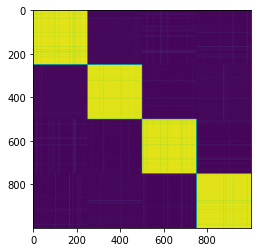

In [11]:
X, n_clusters_estimated = SPUR(adds_similarities, n_examples, 2, n_comparisons)

plt.figure()
plt.imshow(X)
plt.show()

### KMeans

The last step consists in applying KMeans on $X$ to find n_clusters_estimated clusters.

In [12]:
clusters_estimated = KMeans(n_clusters=n_clusters_estimated).fit_predict(X.T)

## Evaluating the Partition

To evaluate the quality of the partition we use the adjusted rand index.

In [15]:
score_adds = adjusted_rand_score(clusters_estimated, original_clusters)

print("AddS-4 with SPUR found a partition with an ARI of {:.2f}.".format(score_adds))

AddS-4 with SPUR found a partition with an ARI of 1.00.
